<a href="https://colab.research.google.com/github/Riaaggarwal06/Hackbattle-/blob/main/HackHers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [337]:
import tensorflow as tf
from tensorflow import keras

In [338]:
!pip install -q streamlit

In [339]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [340]:
dataset = pd.read_csv('heart_disease.csv')

In [341]:
mapping = {'yes': 1, 'no': 0}
dataset['prevalentStroke'] = dataset['prevalentStroke'].map(mapping)
dataset['Heart_ stroke'] = dataset['Heart_ stroke'].map(mapping)
mapping = {'Yes': 1, 'No': 0}
dataset['ever_married'] = dataset['ever_married'].map(mapping)
mapping = {'Male': 1, 'Female': 0}
dataset['Gender'] = dataset['Gender'].map(mapping)
mapping = {'Urban': 1, 'Rural': 0}
dataset['Residence_type'] = dataset['Residence_type'].map(mapping)

In [342]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [343]:
print(X)

[[ 0.   32.    1.   ... 29.84 80.   88.  ]
 [ 0.   33.    0.   ... 21.61 75.   93.  ]
 [ 0.   33.    1.   ... 19.84 86.   69.  ]
 ...
 [ 0.   69.    0.   ... 26.27 60.   77.  ]
 [ 0.   70.    1.   ...   nan 68.   62.  ]
 [ 0.   70.    0.   ... 31.78 60.   95.  ]]


In [344]:
print(y)

[nan nan nan ... nan  1. nan]


In [345]:
dataset.isnull().sum()

Gender                0
age                   0
Residence_type        0
heart_disease         0
ever_married          0
currentSmoker         0
cigsPerDay           29
BPMeds               53
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol              50
sysBP                 0
diaBP                 0
BMI                  19
heartRate             1
glucose             388
Heart_ stroke      3594
dtype: int64

In [346]:
dataset

,Gender,age,Residence_type,heart_disease,ever_married,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,0,32,1,0,1,1,15.0,0.0,0,0,0,242.0,111.0,70.0,29.84,80.0,88.0,NaN
1,0,33,0,0,1,1,15.0,0.0,0,0,0,199.0,116.0,81.0,21.61,75.0,93.0,NaN
2,0,33,1,0,0,0,0.0,0.0,0,0,0,158.0,108.0,67.0,19.84,86.0,69.0,NaN
3,1,33,1,0,1,0,0.0,0.0,0,1,0,165.0,141.5,95.0,26.74,54.0,77.0,NaN
4,0,33,1,0,1,1,5.0,0.0,0,0,0,200.0,119.0,74.0,23.80,75.0,74.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,69,1,1,0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1.0
4234,1,69,0,0,1,1,23.0,0.0,0,1,0,186.0,179.0,93.0,26.64,72.0,67.0,NaN
4235,0,69,0,0,1,0,0.0,1.0,0,1,0,220.0,143.0,81.0,26.27,60.0,77.0,NaN
4236,0,70,1,0,1,0,0.0,0.0,1,1,0,107.0,143.0,93.0,NaN,68.0,62.0,1.0


In [347]:
dataset['prevalentStroke'].value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

In [348]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 5:])
X[:, 5:] = imputer.transform(X[:, 5:])

In [349]:
dataset.isnull().sum()

Gender                0
age                   0
Residence_type        0
heart_disease         0
ever_married          0
currentSmoker         0
cigsPerDay           29
BPMeds               53
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol              50
sysBP                 0
diaBP                 0
BMI                  19
heartRate             1
glucose             388
Heart_ stroke      3594
dtype: int64

In [350]:
print(X)

[[ 0.         32.          1.         ... 29.84       80.
  88.        ]
 [ 0.         33.          0.         ... 21.61       75.
  93.        ]
 [ 0.         33.          1.         ... 19.84       86.
  69.        ]
 ...
 [ 0.         69.          0.         ... 26.27       60.
  77.        ]
 [ 0.         70.          1.         ... 25.80200758 68.
  62.        ]
 [ 0.         70.          0.         ... 31.78       60.
  95.        ]]


In [351]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [352]:
print(y)

[1 1 1 ... 1 0 1]


In [353]:
print(X)

[[ 0.         32.          1.         ... 29.84       80.
  88.        ]
 [ 0.         33.          0.         ... 21.61       75.
  93.        ]
 [ 0.         33.          1.         ... 19.84       86.
  69.        ]
 ...
 [ 0.         69.          0.         ... 26.27       60.
  77.        ]
 [ 0.         70.          1.         ... 25.80200758 68.
  62.        ]
 [ 0.         70.          0.         ... 31.78       60.
  95.        ]]


In [354]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [355]:
print(X_train)


[[ 0.         61.          0.         ... 23.16       74.
  62.        ]
 [ 1.         48.          1.         ... 32.58       75.
  77.        ]
 [ 1.         48.          0.         ... 25.83       80.
  78.        ]
 ...
 [ 1.         46.          0.         ... 18.         78.
  81.96675325]
 [ 1.         52.          1.         ... 23.78       69.
  70.        ]
 [ 0.         53.          1.         ... 20.31       72.
  76.        ]]


In [356]:
print(y_train)

[1 1 1 ... 1 1 1]


In [357]:
print(X_test)

[[ 0.         46.          1.         ... 34.52       80.
  72.        ]
 [ 0.         37.          1.         ... 22.71       76.
  63.        ]
 [ 0.         36.          0.         ... 33.36       55.
  71.        ]
 ...
 [ 1.         61.          0.         ... 31.31       60.
  81.96675325]
 [ 0.         52.          1.         ... 26.03       75.
  82.        ]
 [ 1.         49.          0.         ... 25.4        67.
  95.        ]]


In [358]:
print(y_test)

[1 1 1 ... 1 1 0]


In [359]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [360]:
print(X_train)

[[-0.86992626  1.33542571 -1.01394237 ... -0.64746883 -0.16083175
  -0.88302585]
 [ 1.14952272 -0.19304774  0.98624935 ...  1.65212758 -0.07766654
  -0.21566189]
 [ 1.14952272 -0.19304774 -1.01394237 ...  0.0043276   0.33815951
  -0.17117096]
 ...
 [ 1.14952272 -0.42819751 -1.01394237 ... -1.90712037  0.17182909
   0.00531359]
 [ 1.14952272  0.27725178  0.98624935 ... -0.49611535 -0.57665781
  -0.5270984 ]
 [-0.86992626  0.39482666  0.98624935 ... -1.3432066  -0.32716218
  -0.26015282]]


In [361]:
print(X_test)

[[-0.86992626 -0.42819751  0.98624935 ...  2.1257175   0.33815951
  -0.43811654]
 [-0.86992626 -1.48637143  0.98624935 ... -0.75732217  0.00549867
  -0.83853492]
 [-0.86992626 -1.60394631 -1.01394237 ...  1.84254002 -1.74097076
  -0.48260747]
 ...
 [ 1.14952272  1.33542571 -1.01394237 ...  1.34209707 -1.3251447
   0.00531359]
 [-0.86992626  0.27725178  0.98624935 ...  0.05315131 -0.07766654
   0.00679277]
 [ 1.14952272 -0.07547286 -1.01394237 ... -0.10064336 -0.74298823
   0.58517487]]


In [362]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [363]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [364]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  9 171]
 [  6 874]]


0.8330188679245283

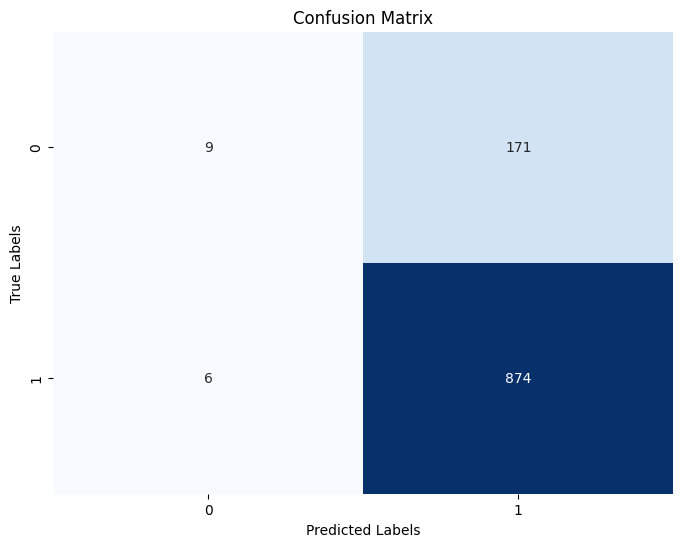

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [366]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle


st.write("""
Hello Users,
Welcome Heart Catalyst: It assist you with the risk prediction
This app predicts heart stroke.

""")

st.sidebar.header('User Input Features')

def user_input_features():
    age = st.sidebar.number_input("Age:")

    sex = st.sidebar.selectbox("Sex", ("Male", "Female"))
    sex = 0 if sex == "Female" else 1

    # education= st.sidebar.selectbox("Education:", ("PrimarySchool","Graduate","PostGraduate","Uneducated"))
    # education = 0
    # if education =="PrimarySchool":

    # elif "PrimarySchool","Graduate","PostGraduate","Uneducated"

    currsmoker = st.sidebar.selectbox('Current Smoker',(0,1))
    nocig = st.sidebar.number_input("Number of Ciggrates")
    bpmed = st.sidebar.selectbox('blood pressure meds',(0,1))

    prevstroke = st.sidebar.selectbox("Prevalent Stroke", ("Yes", "No"))
    prevstroke = 0 if prevstroke== "Yes" else 1

    prevhyp = st.sidebar.selectbox("Prevalent HYP", (0, 1))
    diabetes = st.sidebar.selectbox("diabetes", (0, 1))
    cholestrol = st.sidebar.number_input("cholestrol")

    data = {'age': age,
            'sex': sex,
            'currentSmoker' : currsmoker,
            'cigsPerDay' : nocig,
            'BPMeds' : bpmed,
            'prevalentStroke' : prevstroke,
            'prevalentHyp' : prevhyp,
            'diabetes' : diabetes,
            'totChol' : cholestrol,
            }

    features = pd.DataFrame(data, index=[0])
    return features
input_df = user_input_features()

heart_dataset = pd.read_csv('heart_disease.csv')
heart_dataset = heart_dataset.drop(columns=['target'])
df = pd.concat([input_df,heart_dataset],axis=0)

df = pd.get_dummies(df, columns = ['sex', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes'])

df = df[:1]

st.write(input_df)
load_clf = pickle.load(open('Random_forest_model.pkl', 'rb'))

prediction = load_clf.predict(df)
prediction_proba = load_clf.predict_proba(df)

st.subheader('Prediction')
st.write(prediction)

st.subheader('Prediction Probability')
st.write(prediction_proba)

KeyError: ignored

In [ ]:
!npm install localtunnel

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

In [ ]:
!npx localtunnel --port 8501

In [ ]:
!npm install localtunnel

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

In [ ]:
!npx localtunnel --port 8501